# Homework1

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstname_Lastname_12345678_COMP47350_Homework1.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Friday, 8 March, 2019, midnight.** 

\## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The problem and data come from a credit scoring company concerned with reducing credit repayment risk. The company wants to use the data collected about their customers to build a data analytics solution for credit risk prediction.
The fundamental task is to use the information about the applicant in their credit report to predict whether they will repay their credit within 2 years. The target variable to predict is a binary variable called RiskPerformance. The value “Bad” indicates that a consumer was 90 days past due or worse at least once over a period of 24 months from when the credit account was opened. The value “Good” indicates that they have made their payments without ever being more than 90 days overdue. The dataset we work with is a sample of the data used in this data challenge: https://community.fico.com/s/explainable-machine-learning-challenge?tabset-3158a=2

Each student will work with a different subset of the data. The CSV file is named using the format: **CreditRisk-[your-student-number].csv**, e.g., **CreditRisk-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40].



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process.
    - Check how many rows and columns your CSV has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuos and which ones as categorical types). 
    - Drop duplicate rows and columns, if any.
    - Drop constant columns, if any.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings.
    - Save the initial discussion of your findings into a single data quality report PDF file.                    The PDF report should focus on the key issues identified in the data and discuss potential strategies              to handle them. Simple listing of tables and plots without discussion and justification will not receive full marks. 

(2). [30] Prepare a data quality plan for the cleaned CSV file. 
    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:
    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

In [1]:
# Import pandas, numpy and matplotlib libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline

# (1). [40] Prepare a data quality report for the CSV file.

### - Check how many rows and columns your CSV has.

In [2]:
# Reading from a csv file, into a data frame
df = pd.read_csv('CreditRisk-17210995.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
# Check how many rows and columns your CSV has.
df.shape

(1000, 24)

We have a 1000 rows and 24 columns.

### - Print the first and the last 5 rows.

In [3]:
# Show first 5 rows of data frame
# The rows are indexed starting from 0
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Good,78,227,5,92,28,0,0,100,-7,...,57,5,2,2,49,79,3,2,2,63
1,Good,77,101,13,63,31,0,0,100,-7,...,9,0,1,1,36,3,2,2,1,40
2,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,Bad,81,131,16,59,19,1,0,90,15,...,30,0,0,0,3,-8,1,1,0,25
4,Good,73,280,8,104,49,0,0,96,60,...,23,2,2,2,51,91,4,2,1,43


In [4]:
# Show last 5 rows of data frame
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Bad,68,178,7,67,36,2,0,78,7,...,54,-7,0,0,17,65,4,5,0,64
996,Bad,77,157,2,86,2,0,0,67,21,...,67,0,0,0,10,-8,1,1,-8,100
997,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
998,Good,83,198,3,53,38,0,0,100,-7,...,8,-7,4,2,4,-8,2,1,0,18
999,Good,73,44,5,18,20,0,0,100,-7,...,35,-7,0,0,23,95,5,3,0,67


### - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 

In [5]:
# Show the data types in each column.
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

In [6]:
# Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 
# Select columns containing categorical data
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns
#MaxDelq2PublicRecLast12M and MaxDelqEver were chosen as category because the different value of them have different meanings

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden                 int64
NumRevolvingTradesWBalance               int64
NumInstallTra

Based on examining the data in a spreadsheet program, I decide to convert these data types:

- **object** values were converted to **categorical** as they contained finite set of possible values.
- the *'MaxDelq2PublicRecLast12M'* and *'MaxDelqEver'* column which is **int64** was converted to **categorical** because the different value of them have different meanings.

### - Drop duplicate rows and columns, if any.

In [7]:
# check for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])

Duplicate rows: 44


In [8]:
df.shape

(1000, 24)

In [9]:
# Drop duplicate rows , if any.
df.duplicated()
df=df.drop_duplicates()

In [10]:
df.shape

(956, 24)

In [11]:
# Check for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate columns: 0


- There are 44 duplicate rows in the dataset.

- The dataset does not contain any duplicate columns.

### - Drop constant columns, if any.
 The file above that categorical features don't have constant columns. 

### - Save your updated/cleaned data frame to a new csv file.

In [12]:
# Save the dataframe to a csv file
df.to_csv('New_CreditRisk_1.csv', index=False)

### -For the updated CSV and data frame (after column/row removal):

In [13]:
# Reading from the new csv file, into a data frame
df = pd.read_csv('New_CreditRisk_1.csv')

### - Prepare a table with descriptive statistics for all the continuous features.

In [14]:
#Prepare a table with descriptive statistics for all the continuous features.
#Select columns containing continuous data
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades', 'NumTrades60Ever2DerogPubRec',
                         'NumTrades90Ever2DerogPubRec', 'PercentTradesNeverDelq', 'MSinceMostRecentDelq', 'NumTotalTrades', 
                         'NumTradesOpeninLast12M', 'PercentInstallTrades', 'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 
                         'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance',
                         'NumInstallTradesWBalance', 'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance',
                         ]].columns

# Print table
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,956.0,72.637029,10.530387,-9.0,65.0,73.0,81.00,94.0
MSinceOldestTradeOpen,956.0,191.313808,104.487229,-9.0,122.0,179.0,248.00,803.0
MSinceMostRecentTradeOpen,956.0,9.904812,13.686556,-9.0,3.0,6.0,12.00,152.0
AverageMInFile,956.0,78.495816,34.420391,-9.0,55.0,76.0,97.25,245.0
NumSatisfactoryTrades,956.0,21.172594,12.028262,-9.0,12.0,20.0,28.00,78.0
NumTrades60Ever2DerogPubRec,956.0,0.528243,1.236545,-9.0,0.0,0.0,1.00,11.0
NumTrades90Ever2DerogPubRec,956.0,0.336820,1.010699,-9.0,0.0,0.0,0.00,10.0
PercentTradesNeverDelq,956.0,92.755230,12.452327,-9.0,90.0,99.5,100.00,100.0
MSinceMostRecentDelq,956.0,8.028243,21.777414,-9.0,-7.0,-7.0,15.00,83.0
NumTotalTrades,956.0,22.496862,13.675713,-9.0,13.0,21.0,30.00,100.0


### - Prepare a table with descriptive statistics for all the categorical features.

In [15]:
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver'
                        ]].columns

# Print table
df[categorical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MaxDelq2PublicRecLast12M,956.0,5.867155,1.689552,-9.0,6.0,6.0,7.0,7.0
MaxDelqEver,956.0,6.414226,1.992122,-9.0,6.0,7.0,8.0,8.0


### - Plot histograms for all the continuous features.

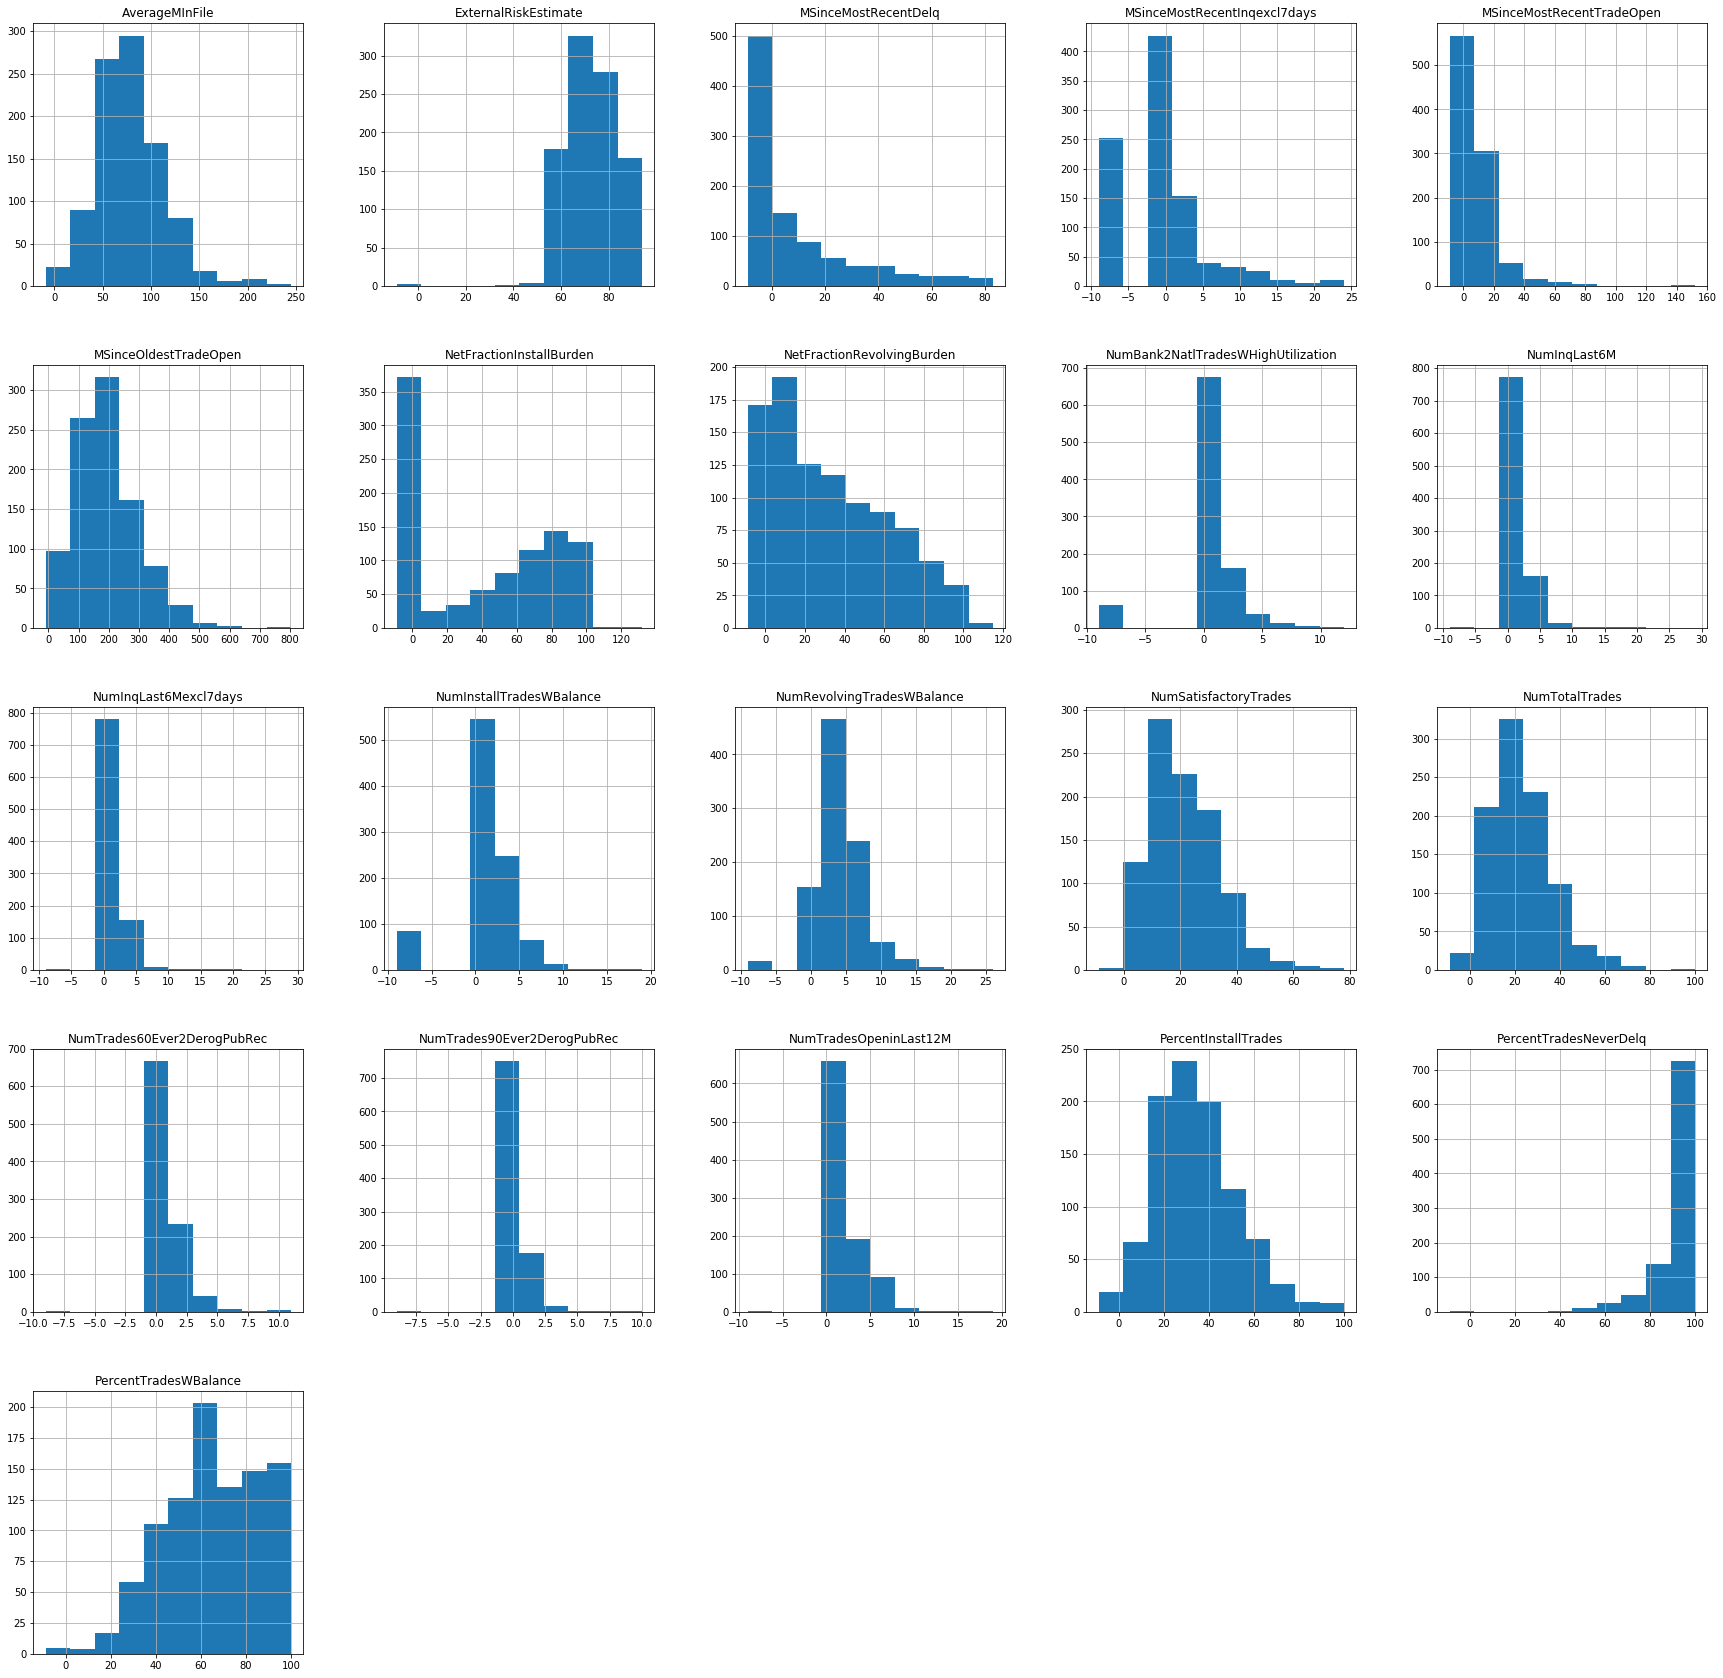

In [16]:
# Plot a histogram of the continuous features (and save in a png file)
df[continuous_columns].hist(figsize=(30,30))
plt.savefig('continuous_histograms_1.pdf')

### - Plot box plots for all the continuous features.

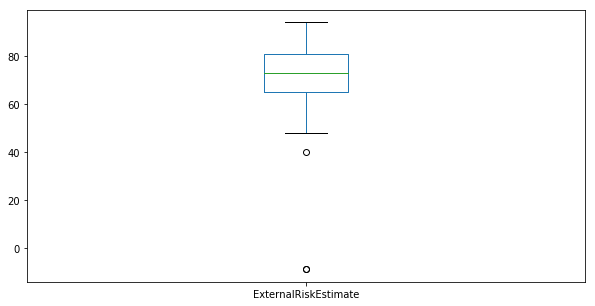

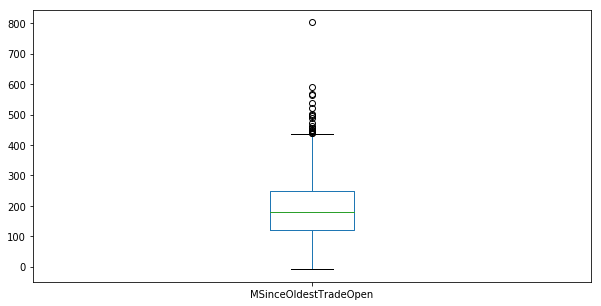

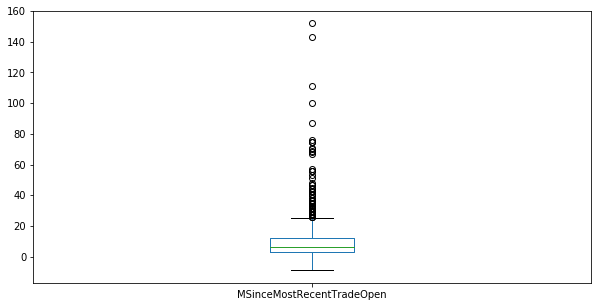

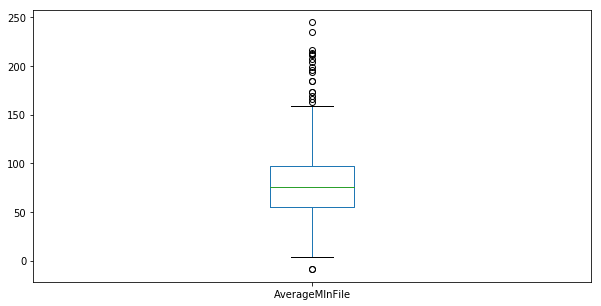

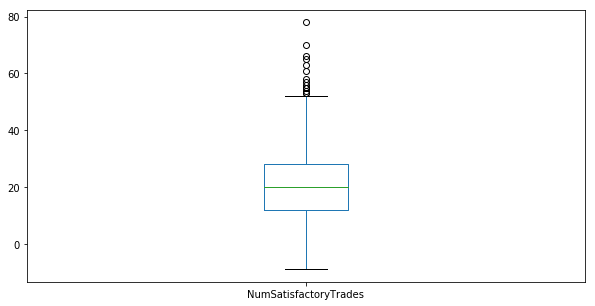

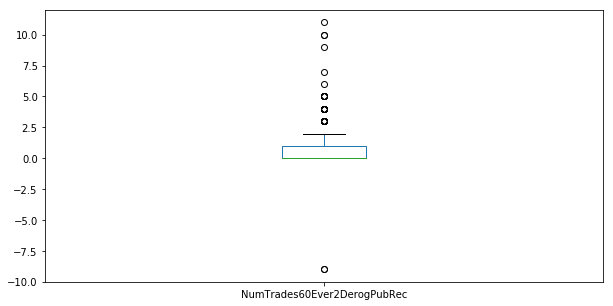

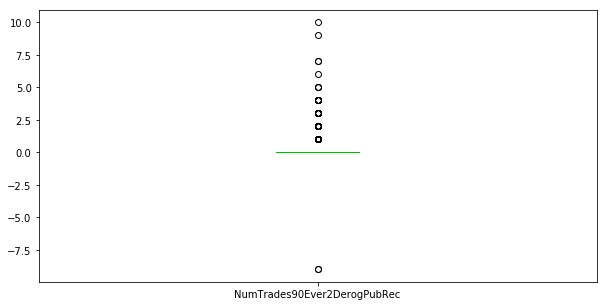

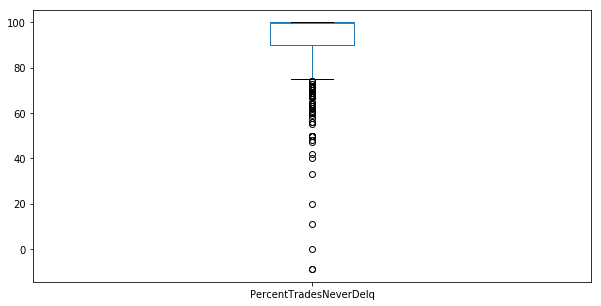

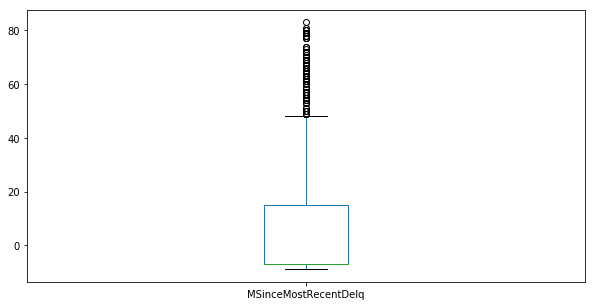

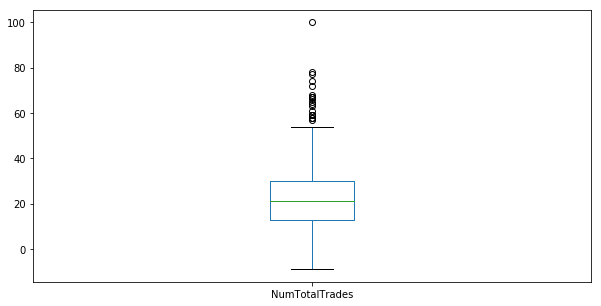

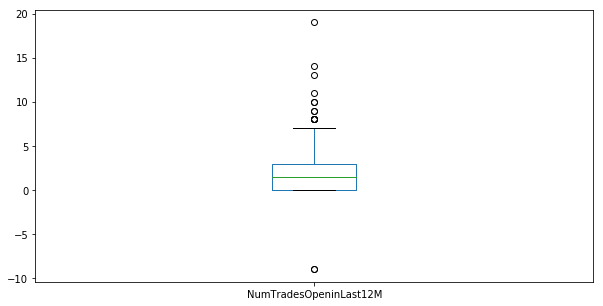

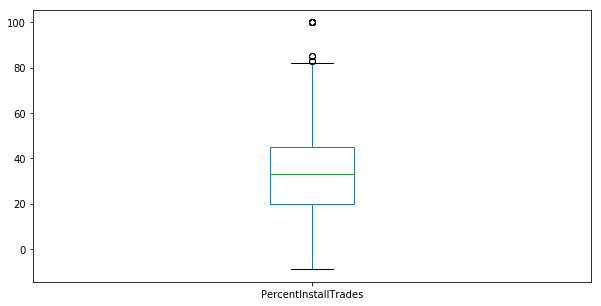

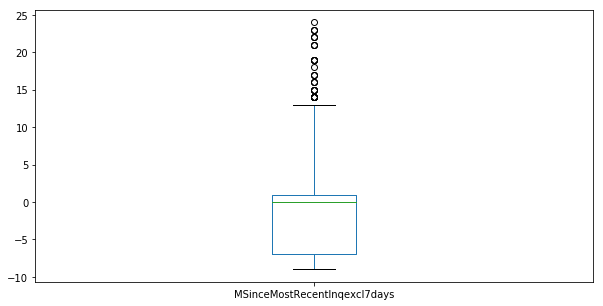

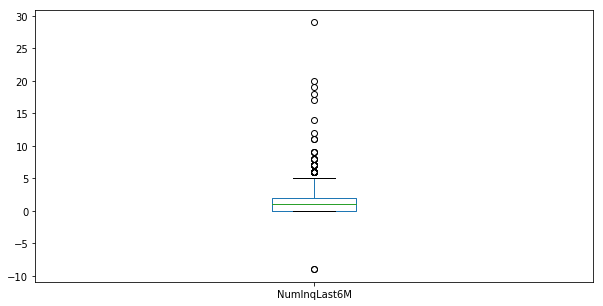

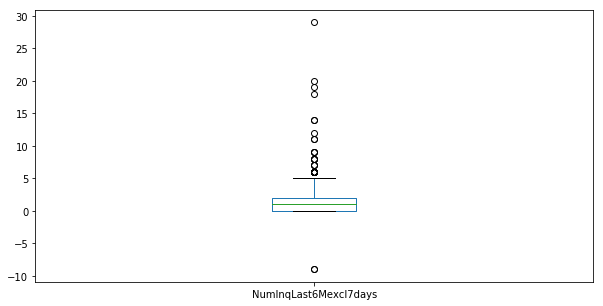

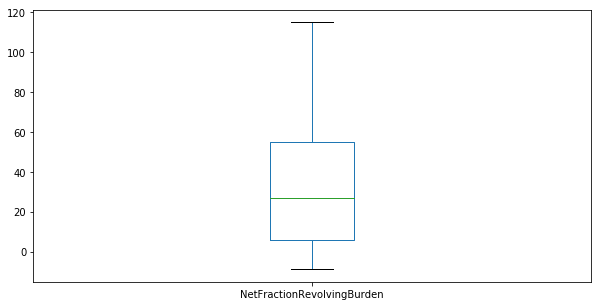

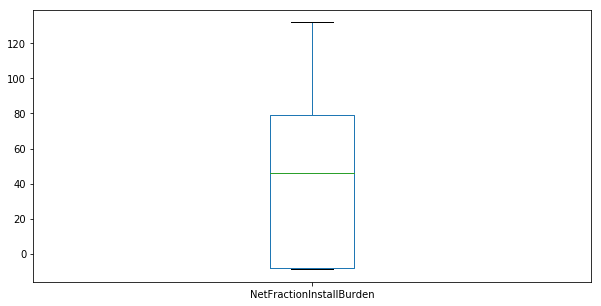

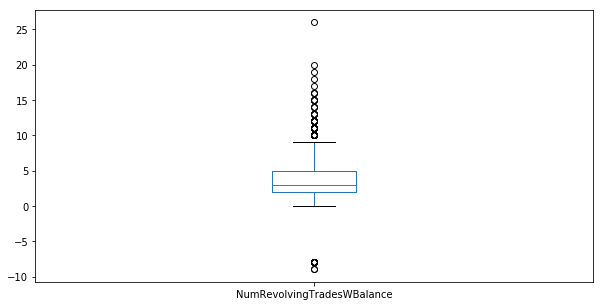

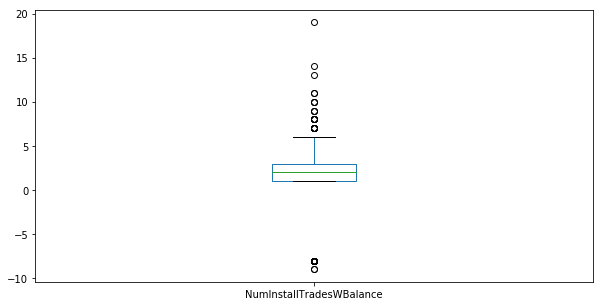

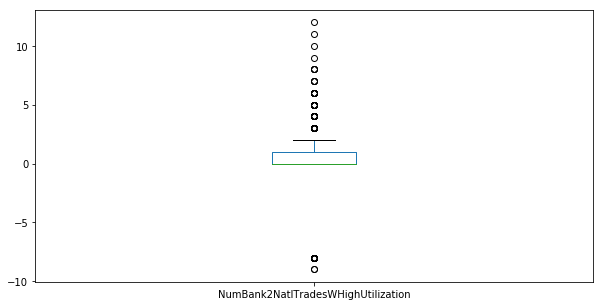

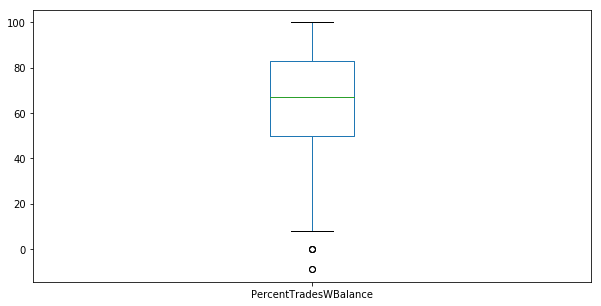

In [17]:
# Plot box plots for all the continuous features and save in a PDF file
pp = PdfPages('continuous_boxplots_1.pdf')

for col in continuous_columns:
    f = df[col].plot(kind='box', figsize=(10,5))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### - Plot bar plots for all the categorical features.

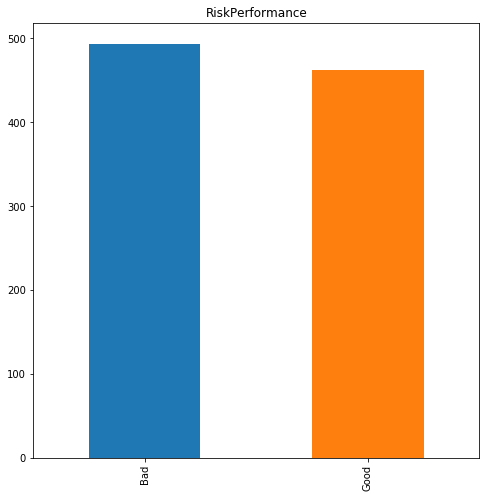

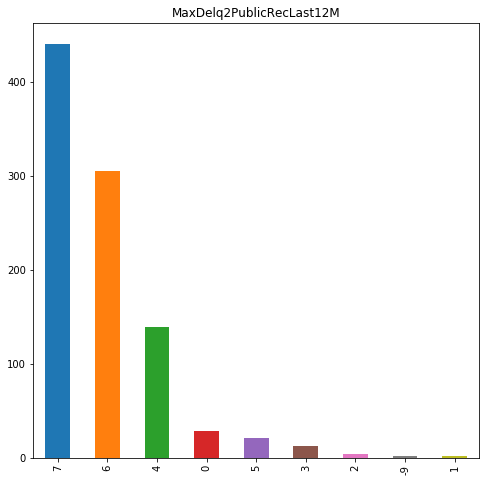

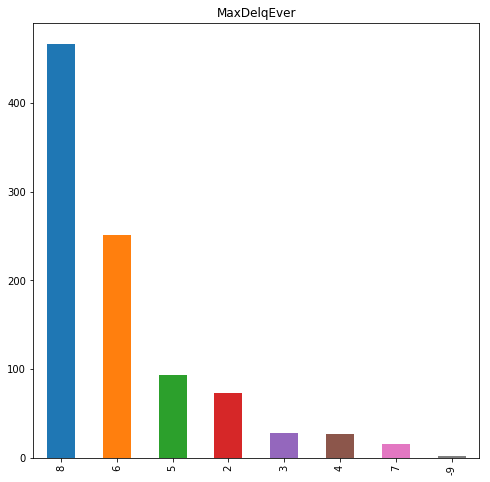

In [18]:
# Plot bar charts for all categorical features and save them in a single PDF file
pp = PdfPages('categorical_barcharts_1.pdf')

for column in categorical_columns:
    f = df[column].value_counts().plot(kind='bar', title=column, figsize=(8,8))
    pp.savefig(f.get_figure())
    plt.show()

pp.close()

### - Discuss your initial findings.

### - Save the initial discussion of your findings into a single data quality report PDF file.  
The discussion can be found in a pdf file called **Data_Quality_Report_Initial_Findings.pdf**

# (2). [30] Prepare a data quality plan for the cleaned CSV file.
### - Mark down all the features where there are potential problems or data quality issues.

The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

- there are a lot of value od -8 in this file, which doesn't have a value. 
- change -7
- there are a lot of value od -8 in this file, which doesn't have a value
- number trades 60+ ever and number trades 90+ ever have the similar count number and trend
- the number of months since most recent delinquency value below 0 is 494 out of 1000, which doesn't have information
- The number of inquires of last 6 months and number of inquires of last 6 months excluding 7days have the similar count numbers and tendency, and the value of the second one below 0 is 253 out of 1000.
- there are two rows are all -9, which is no record
- there are a lot of outliers in most of the features


### In adition to the problems above, I'll perform some standard checks to find any aditional issues:

### Check for Irregular cardinalities

In [19]:
# Check for irregular cardinality in categorical features. There could be same values spelled differently
print("Unique values for:\n- RiskPerformance:", pd.unique(df.RiskPerformance.ravel()))
print("\n- MaxDelq2PublicRecLast12M:", pd.unique(df.MaxDelq2PublicRecLast12M.ravel()))
print("\n- MaxDelqEver:", pd.unique(df.MaxDelqEver.ravel()))


Unique values for:
- RiskPerformance: ['Good' 'Bad']

- MaxDelq2PublicRecLast12M: [ 7 -9  6  4  1  2  5  3  0]

- MaxDelqEver: [ 8 -9  5  6  7  3  2  4]


- There is no irregular cardinalities in this categorical features. The cardinality of those features is correct

### Null values

In [20]:
# Check whether there are null values in the data where values would be expected
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

- There is no null value in this file

### Negative values

In [21]:
# Check whether there are null values in the data where values would be expected
(df<0).sum()

RiskPerformance                       956
ExternalRiskEstimate                    2
MSinceOldestTradeOpen                  28
MSinceMostRecentTradeOpen               2
AverageMInFile                          2
NumSatisfactoryTrades                   2
NumTrades60Ever2DerogPubRec             2
NumTrades90Ever2DerogPubRec             2
PercentTradesNeverDelq                  2
MSinceMostRecentDelq                  494
MaxDelq2PublicRecLast12M                2
MaxDelqEver                             2
NumTotalTrades                          2
NumTradesOpeninLast12M                  2
PercentInstallTrades                    2
MSinceMostRecentInqexcl7days          253
NumInqLast6M                            2
NumInqLast6Mexcl7days                   2
NetFractionRevolvingBurden             18
NetFractionInstallBurden              359
NumRevolvingTradesWBalance             17
NumInstallTradesWBalance               84
NumBank2NatlTradesWHighUtilization     61
PercentTradesWBalance             

- the value of months since most recent delinquency, months since most recent inquires excluding 7days, net fraction installment burden under 0 are too much, which don't have record.

### - Propose solutions to deal with the problems identified. Explain why did you choose one solution over potentially many other.




Data collection takes a long time, so for any problem, I will try to maintain the integrity of the data before modification, as far as possible to protect the data

1. **there are a lot of value of -8 in this file, which doesn't have a value**. I decide to perform imutaion by setting the -8 with value of 0 to the median value of the sample.
2. **change -7 to null values** create new coloms
3. **number trades 60+ ever and number trades 90+ ever have the similar count number and trend**it is unnecessary to have this two similar records, so one of these two features may have to be dropped, and the 90+days contains the 60+ days, the 60+ days would be deleted.
4. **the number of months since most recent delinquency value below 0 is 494 out of 1000, which doesn't have information.** As close 50% of values are missing, this feature will have to be dropped.
5. **number of inquires of last 6 months and number of inquires of last 6 months excluding 7days have the similar count numbers and tendency, the number of months since most recent inquires excluding 7days value below 0 is 253 out of 1000.** As the exclude 7 days has a similar feature and there are too much value that below 0, which is unknown value, so this feature ould be dropped
6. **There are two rows are all -9, which is no record** This two rows shoulf be dropped
7. **there are a lot of outliers in most of the features**
Investigate if the outliers can be justified. If they make sense, keep them. If they don't make sense, remove the outlier rows.


### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **there are a lot of value of -8 in this file, which doesn't have a value**. I decide to perform imutaion by setting the -8 with value of 0 to the median value of the sample.

In [22]:
df[continuous_columns].isin([-8]).sum()

ExternalRiskEstimate                    0
MSinceOldestTradeOpen                  26
MSinceMostRecentTradeOpen               0
AverageMInFile                          0
NumSatisfactoryTrades                   0
NumTrades60Ever2DerogPubRec             0
NumTrades90Ever2DerogPubRec             0
PercentTradesNeverDelq                  0
MSinceMostRecentDelq                   10
NumTotalTrades                          0
NumTradesOpeninLast12M                  0
PercentInstallTrades                    0
MSinceMostRecentInqexcl7days           62
NumInqLast6M                            0
NumInqLast6Mexcl7days                   0
NetFractionRevolvingBurden             16
NetFractionInstallBurden              357
NumRevolvingTradesWBalance             15
NumInstallTradesWBalance               82
NumBank2NatlTradesWHighUtilization     59
PercentTradesWBalance                   0
dtype: int64

In [23]:
print("The MSinceOldestTradeOpen is that will be used is: ", df['MSinceOldestTradeOpen'].median())
df['MSinceOldestTradeOpen'] = df['MSinceOldestTradeOpen'].replace(-8, df['MSinceOldestTradeOpen'].median())

The MSinceOldestTradeOpen is that will be used is:  179.0


In [24]:
print("The MSinceMostRecentDelq is that will be used is: ", df['MSinceMostRecentDelq'].median())
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-8, df['MSinceMostRecentDelq'].median())

The MSinceMostRecentDelq is that will be used is:  -7.0


In [25]:
print("The MSinceMostRecentInqexcl7days is that will be used is: ", df['MSinceMostRecentInqexcl7days'].median())
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-8, df['MSinceMostRecentInqexcl7days'].median())

The MSinceMostRecentInqexcl7days is that will be used is:  0.0


In [26]:
print("The NetFractionRevolvingBurden is that will be used is: ", df['NetFractionRevolvingBurden'].median())
df['NetFractionRevolvingBurden'] = df['NetFractionRevolvingBurden'].replace(-8, df['NetFractionRevolvingBurden'].median())

The NetFractionRevolvingBurden is that will be used is:  27.0


In [27]:
print("The NetFractionInstallBurden is that will be used is: ", df['NetFractionInstallBurden'].median())
df['NetFractionInstallBurden'] = df['NetFractionInstallBurden'].replace(-8, df['NetFractionInstallBurden'].median())

The NetFractionInstallBurden is that will be used is:  46.0


In [28]:
print("The NumRevolvingTradesWBalance  is that will be used is: ", df['NumRevolvingTradesWBalance'].median())
df['NumRevolvingTradesWBalance'] = df['NumRevolvingTradesWBalance'].replace(-8, df['NumRevolvingTradesWBalance'].median())

The NumRevolvingTradesWBalance  is that will be used is:  3.0


In [29]:
print("The NumInstallTradesWBalance is that will be used is: ", df['NumInstallTradesWBalance'].median())
df['NumInstallTradesWBalance'] = df['NumInstallTradesWBalance'].replace(-8, df['NumInstallTradesWBalance'].median())

The NumInstallTradesWBalance is that will be used is:  2.0


In [30]:
print("The NumBank2NatlTradesWHighUtilization is that will be used is: ", df['NumBank2NatlTradesWHighUtilization'].median())
df['NumBank2NatlTradesWHighUtilization'] = df['NumBank2NatlTradesWHighUtilization'].replace(-8, df['NumBank2NatlTradesWHighUtilization'].median())

The NumBank2NatlTradesWHighUtilization is that will be used is:  0.0


2. **change -7 to null value** -7 is the value that the inquiries, and no delinquent

In [31]:
df.replace(-7, np.NaN)
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-7, np.NaN)
df['MSinceOldestTradeOpen'] = df['MSinceOldestTradeOpen'].replace(-7, np.NaN)

3. **number trades 60+ ever and number trades 90+ ever have the similar count number and trend**.
it is unnecessary to have this two similar records, so one of these two features may have to be dropped, and the 90+days contains the 60+ days, the 60+ days would be deleted.

In [32]:
df = df.drop('NumTrades60Ever2DerogPubRec', 1)

4. **the number of months since most recent delinquency value below 0 is 494 out of 1000, which doesn't have information.** As close 50% of values are missing, this feature will have to be dropped.

In [33]:
df = df.drop('MSinceMostRecentDelq', 1)

5. **number of inquires of last 6 months and number of inquires of last 6 months excluding 7days have the similar count numbers and tendency, the number of months since most recent inquires excluding 7days value below 0 is 253 out of 1000.** As the exclude 7 days has a similar feature and there are too much value that below 0, which is unknown value, so this feature ould be dropped

In [34]:
df = df.drop('NumInqLast6Mexcl7days', 1)

6. **There are two rows are all -9, which is no record** This two rows should be dropped

In [35]:
df[df['NumBank2NatlTradesWHighUtilization'] == -9]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,...,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
2,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9.0,-9,-9,-9,-9,-9,-9,-9
16,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9.0,-9,-9,-9,-9,-9,-9,-9


In [36]:
df=df.drop(df[df.NumBank2NatlTradesWHighUtilization ==- 9].index)

In [37]:
df[df['NumBank2NatlTradesWHighUtilization'] == -9]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MaxDelq2PublicRecLast12M,MaxDelqEver,...,NumTradesOpeninLast12M,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance


7. **there are a lot of outliers in most of the features**
Investigate if the outliers can be justified. If they make sense, keep them. If they don't make sense, remove the outlier rows.

The columns with outliers are:
- ExternalRiskEstimate.
- MSinceOldestTradeOpen.
- MSinceMostRecentTradeOpen.
- Average Months in File.
- Number Satisfactory Trades.
- Number Trades 90+ Ever.
- Number of Total Trades (total number of credit accounts).
- Number of Trades Open in Last 12 Months.
- Percent Installment Trades.
- Months Since Most Recent Inq excl 7days.
- Number of Inq Last 6 Months.
- Number Revolving Trades with Balance.
- Number Installment Trades with Balance.
- Number Bank/Natl Trades w high utilization ratio.
- Percent Trades Never Delinquent.
- Percent Trades with Balance.
- Net Fraction Revolving Burden
- Net Fraction Installment Burden


In [38]:
df.sort_values(by='NumTotalTrades', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['NumTotalTrades','NumTrades90Ever2DerogPubRec','NumTradesOpeninLast12M','NumSatisfactoryTrades','NumInstallTradesWBalance','NumRevolvingTradesWBalance','NumInqLast6M', 'NumBank2NatlTradesWHighUtilization']].head(5)

,NumTotalTrades,NumTrades90Ever2DerogPubRec,NumTradesOpeninLast12M,NumSatisfactoryTrades,NumInstallTradesWBalance,NumRevolvingTradesWBalance,NumInqLast6M,NumBank2NatlTradesWHighUtilization
460,100,1,19,78,3,10,6,1
862,78,0,1,55,8,7,0,3
655,77,2,6,66,3,6,0,1
523,74,0,3,49,5,10,2,1
375,72,0,5,70,2,8,1,2


In [39]:
df.sort_values(by='MSinceOldestTradeOpen', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['MSinceOldestTradeOpen', 'MSinceMostRecentTradeOpen', 'AverageMInFile', 'MSinceMostRecentInqexcl7days']].head(5)

,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,MSinceMostRecentInqexcl7days
268,803,3,101,3.0
390,589,3,213,0.0
810,566,8,85,0.0
701,565,4,148,NaN
595,538,47,212,0.0


the row of months since oldest trade open is 803, which is a huge period of time that compare to another ouliers, the difference is more than 200 months, so the row need to be dropped.

In [40]:
df=df.drop(df[df.MSinceOldestTradeOpen == 803].index)

In [41]:
df.sort_values(by='PercentTradesNeverDelq', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['PercentTradesNeverDelq', 'ExternalRiskEstimate', 'PercentTradesWBalance', 'PercentInstallTrades','NetFractionRevolvingBurden','NetFractionInstallBurden']].head(5)

,PercentTradesNeverDelq,ExternalRiskEstimate,PercentTradesWBalance,PercentInstallTrades,NetFractionRevolvingBurden,NetFractionInstallBurden
0,100,78,63,57,49,79
648,100,66,75,40,77,60
533,100,84,40,33,11,46
536,100,81,88,0,41,46
537,100,80,40,10,57,46


### Summary of data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| RiskPerformance         | Outliers             | Imputation                   |
| ExternalRiskEstimate    | Outliers             | Do nothing                   | 
| MSinceOldestTradeOpen   | Outliers             | Do nothing                   |
| MSinceMostRecentTradeOpen| Outliers            | Do nothing                   |
| AverageMInFile          | Outliers             | Do nothing                   |
| NumSatisfactoryTrades   | Outliers             | Do nothing                   |
| NumTrades60Ever2DerogPubRec| Repeat information| Remove column                |
| NumTrades90Ever2DerogPubRec| Outliers          | Do nothing                   |
| PercentTradesNeverDelq  | Outliers             | Do nothing                   |
| MSinceMostRecentDelq    | Missing Values (~50%)| Remove column                |
| MaxDelq2PublicRecLast12M| Outliers             | Do nothing                   |
| MaxDelqEver             | Outliers             | Do nothing                   |
| NumTotalTrades          | Outliers             | Do nothing                   |
| NumTradesOpeninLast12M  | Outliers             | Do nothing                   |
| PercentInstallTrades    | Outliers             | Do nothing                   |
| MSinceMostRecentInqexcl7days|Repeat information| Remove column                |
| NumInqLast6M            | Outliers             | Do nothing                   |
| NumInqLast6Mexcl7days   | Outliers             | Do nothing                   |
| NetFractionRevolvingBurden| Outliers           | Do nothing                   |
| NetFractionInstallBurden| Outliers             | Do nothing                   |
| NumRevolvingTradesWBalance| Outliers           | Do nothing                   |
| NumInstallTradesWBalance Outliers| Outliers    | Do nothing                   |
| NumBank2NatlTradesWHighUtilization| Outliers   | Do nothing                   |
| PercentTradesWBalance   | Outliers             | Do nothing                   |
               

### - Save the new CSV file with a self explanatory name.  Save the data quality plan to a single PDF file.

In [42]:
 # Print table with descriptive statistics for all the continuous features
df.select_dtypes(['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,953.0,72.801679,9.857361,40.0,65.0,73.0,81.0,94.0
MSinceOldestTradeOpen,953.0,196.194124,96.798799,4.0,129.0,179.0,248.0,589.0
MSinceMostRecentTradeOpen,953.0,9.951731,13.678780,0.0,3.0,6.0,12.0,152.0
AverageMInFile,953.0,78.655824,34.232385,4.0,56.0,76.0,97.0,245.0
NumSatisfactoryTrades,953.0,21.218258,11.955037,1.0,13.0,20.0,28.0,78.0
NumTrades90Ever2DerogPubRec,953.0,0.356768,0.917099,0.0,0.0,0.0,0.0,10.0
PercentTradesNeverDelq,953.0,92.961175,11.562834,0.0,90.0,100.0,100.0,100.0
MaxDelq2PublicRecLast12M,953.0,5.897167,1.548217,0.0,6.0,6.0,7.0,7.0
MaxDelqEver,953.0,6.444911,1.865025,2.0,6.0,7.0,8.0,8.0
NumTotalTrades,953.0,22.547744,13.612744,0.0,13.0,21.0,30.0,100.0


In [43]:
# Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuos and which ones as categorical types). 
# Select columns containing categorical data
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns
#MaxDelq2PublicRecLast12M and MaxDelqEver were chosen as category because the different value of them have different meanings

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')

In [44]:
# Print table with descriptive statistics for all the categorical features
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,953,2,Bad,493
MaxDelq2PublicRecLast12M,953,8,7,440
MaxDelqEver,953,7,8,466


In [45]:
# Write the dataframe to a csv file
df.to_csv('New_CreditRisk_2_cleaned.csv', index=False)

# (3). [15] Exploring relationships between feature pairs:

In [46]:
df = pd.read_csv('New_CreditRisk_2_cleaned.csv')

 ### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following continuous features:
- ExternalRiskEstimate
- PercentTradesNeverDelq
- MSinceOldestTradeOpen
- MSinceMostRecentInqexcl7days
- NumSatisfactoryTrades
- NumTotalTrades
- NetFractionRevolvingBurden
- PercentTradesWBalance
- NumBank2NatlTradesWHighUtilization
- NumRevolvingTradesWBalance



and the all following categorical features:
- RiskPerformance
- MaxDelq2PublicRecLast12M
- MaxDelqEver

I first compared the correlation of all the continuous feature, and then picked the columns that the correlation number above0.5,  which is the most likely affected outcoms

### Correlations for the numeric features

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text xticklabel objects>)

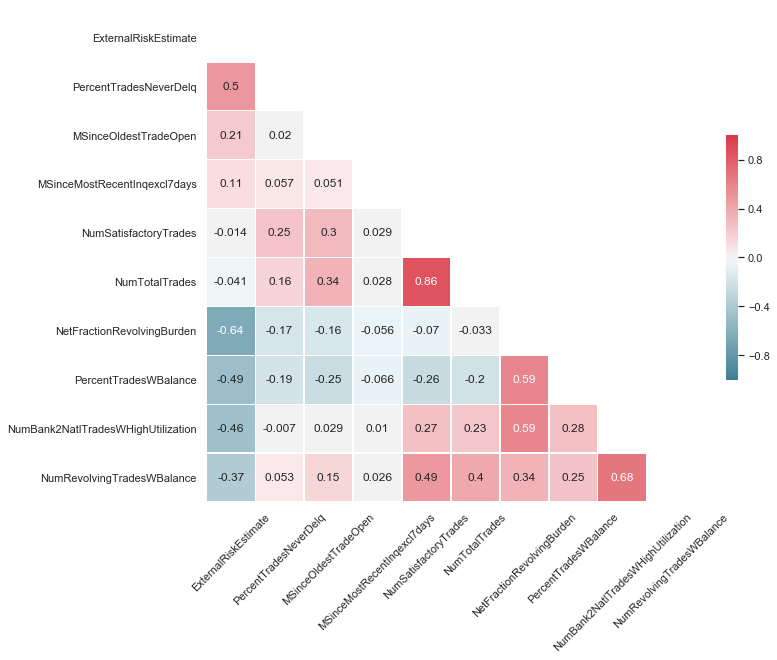

In [47]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
continuous_columns = df[['ExternalRiskEstimate','PercentTradesNeverDelq','MSinceOldestTradeOpen','MSinceMostRecentInqexcl7days','NumSatisfactoryTrades','NumTotalTrades','NetFractionRevolvingBurden','PercentTradesWBalance','NumBank2NatlTradesWHighUtilization','NumRevolvingTradesWBalance']].columns

# Calculate correlation of all pairs of continuous features
corr = df[continuous_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

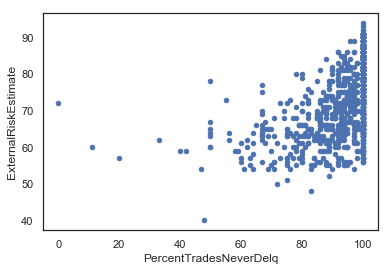

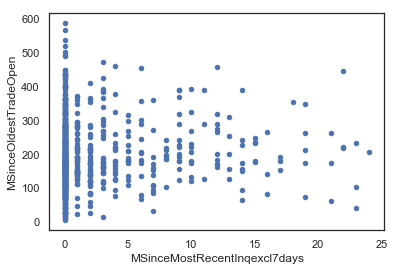

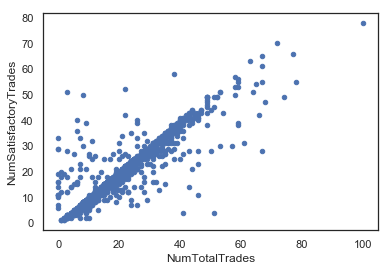

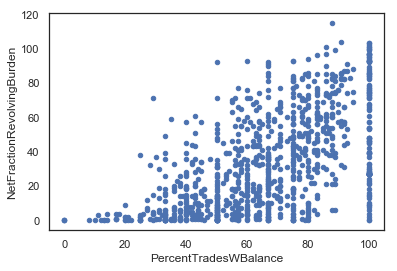

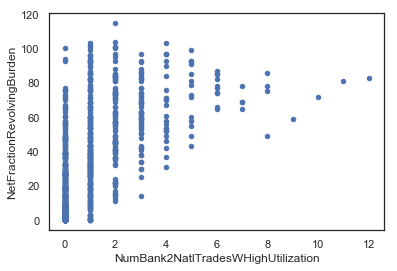

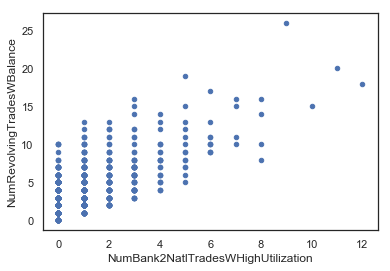

In [48]:
df.plot(kind='scatter', x='PercentTradesNeverDelq', y='ExternalRiskEstimate')
df.plot(kind='scatter', x='MSinceMostRecentInqexcl7days', y='MSinceOldestTradeOpen')
df.plot(kind='scatter', x='NumTotalTrades', y='NumSatisfactoryTrades')
df.plot(kind='scatter', x='PercentTradesWBalance', y='NetFractionRevolvingBurden')
df.plot(kind='scatter', x='NumBank2NatlTradesWHighUtilization', y='NetFractionRevolvingBurden')
df.plot(kind='scatter', x='NumBank2NatlTradesWHighUtilization', y='NumRevolvingTradesWBalance')

### Categorical feature plots

(0, 100)

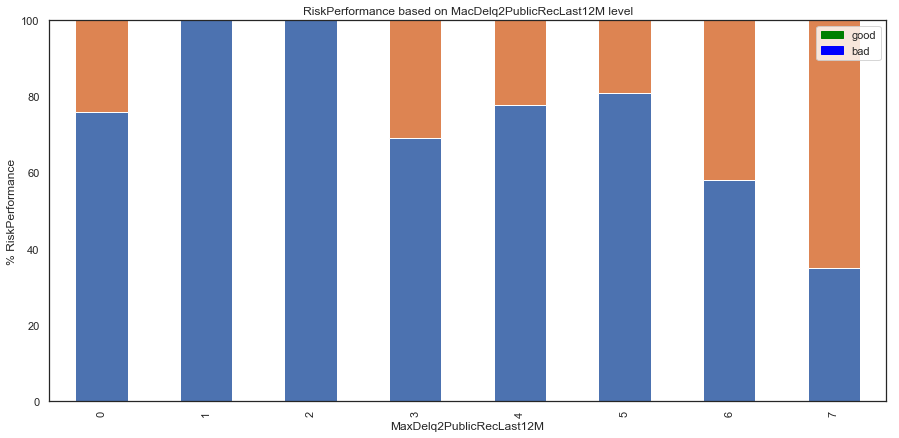

In [49]:
#Using code from the module lab
MaxDelq2PublicRecLast12M = pd.unique(df.MaxDelq2PublicRecLast12M.ravel())

df['percent'] = 0

for i in MaxDelq2PublicRecLast12M:
    count = 1 / df[df.MaxDelq2PublicRecLast12M == i].count()['MaxDelq2PublicRecLast12M']
    index_list = df[df['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','MaxDelq2PublicRecLast12M','RiskPerformance']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on MacDelq2PublicRecLast12M level", figsize=(15,7))

red_patch = mpatches.Patch(color='green', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MaxDelq2PublicRecLast12M")
my_plot.set_ylabel("% RiskPerformance")
my_plot.set_ylim([0,100])

(0, 100)

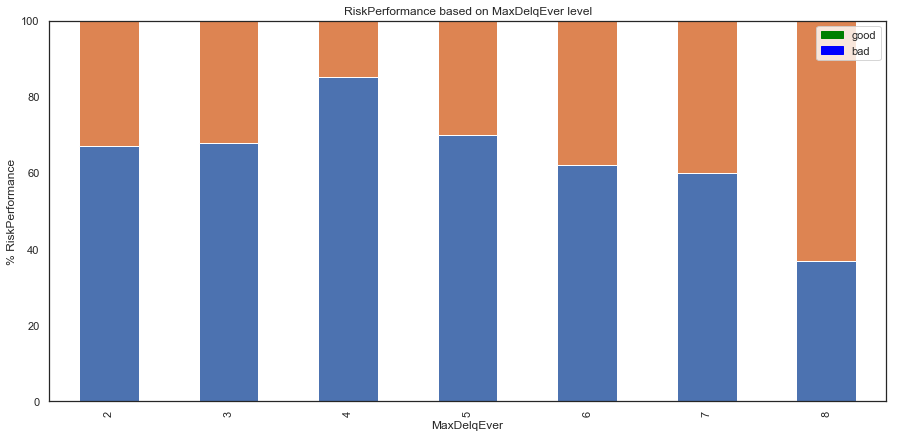

In [50]:
#Using code from the module lab
MaxDelqEver = pd.unique(df.MaxDelqEver.ravel())

df['percent'] = 0

for i in MaxDelqEver:
    count = 1 / df[df.MaxDelqEver == i].count()['MaxDelqEver']
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','MaxDelqEver','RiskPerformance']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on MaxDelqEver level", figsize=(15,7))

red_patch = mpatches.Patch(color='green', label='good')
blue_patch = mpatches.Patch(color='blue', label='bad')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("MaxDelqEver")
my_plot.set_ylabel("% RiskPerformance")
my_plot.set_ylim([0,100])

Seems like these plots don't give any useful information.

### Continuous-categorical feature plots

<Figure size 432x288 with 0 Axes>

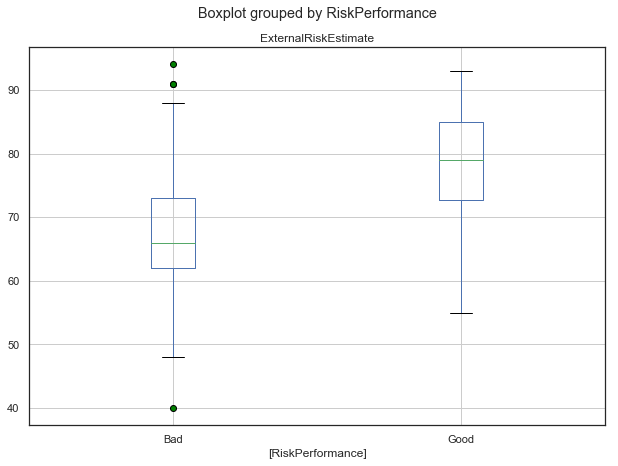

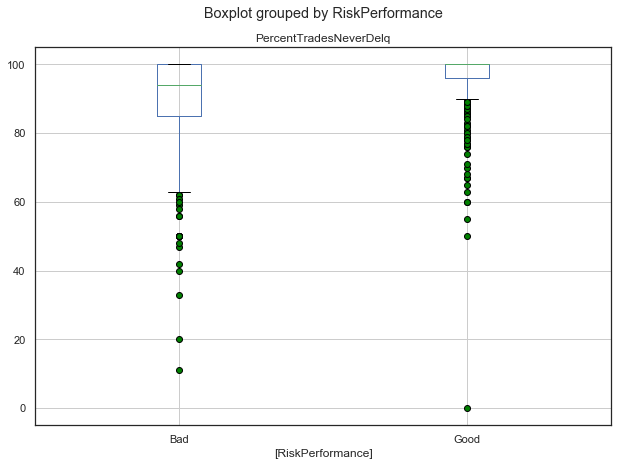

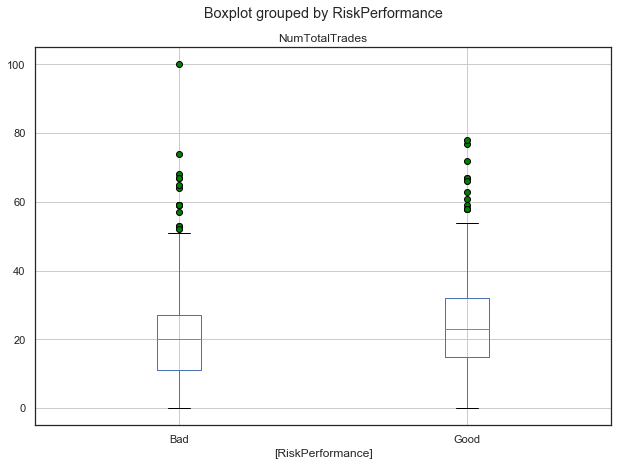

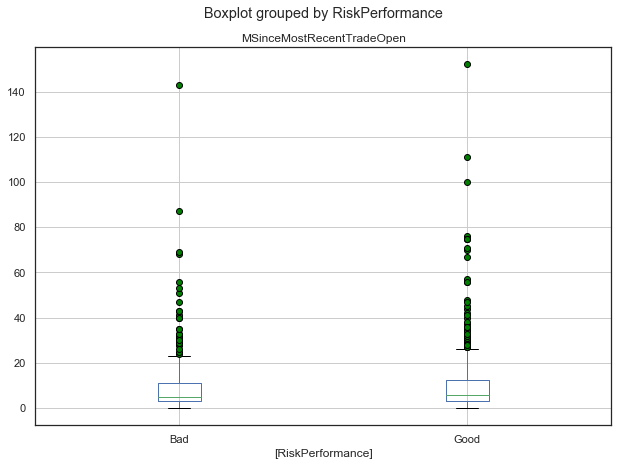

In [51]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['ExternalRiskEstimate'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['PercentTradesNeverDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['MSinceMostRecentTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1be018d0>]],
      dtype=object)

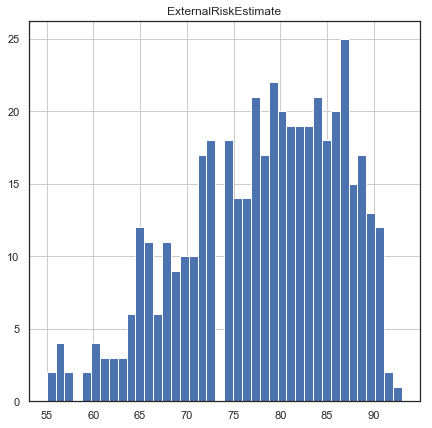

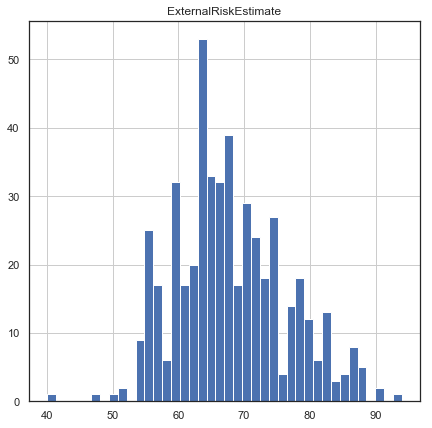

In [52]:
df[df['RiskPerformance'] == 'Good'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['ExternalRiskEstimate']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b39d4a8>]],
      dtype=object)

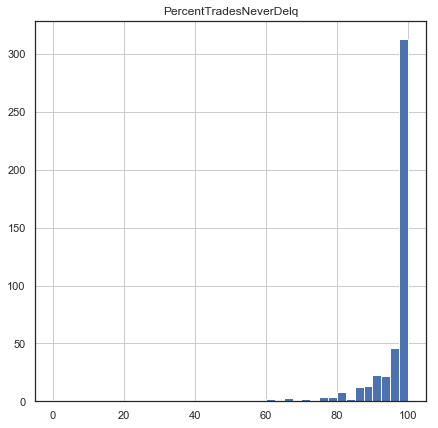

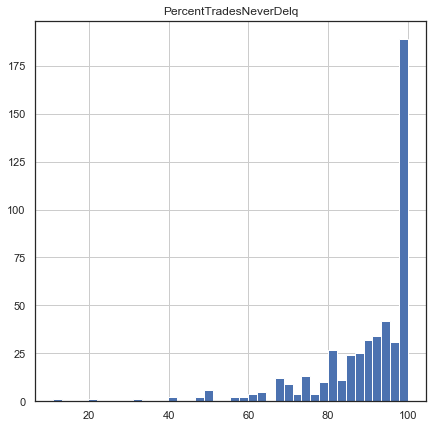

In [53]:
df[df['RiskPerformance'] == 'Good'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bb13ef0>]],
      dtype=object)

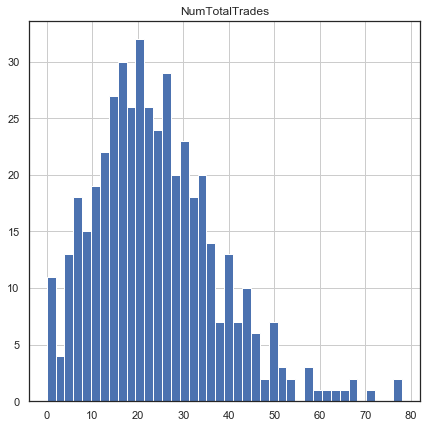

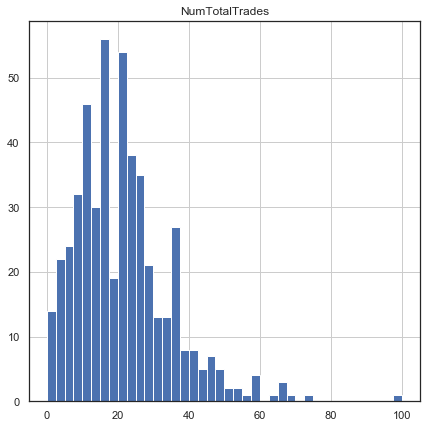

In [54]:
df[df['RiskPerformance'] == 'Good'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['NumTotalTrades']].hist(figsize=(7,7), bins=40)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bcfa080>]],
      dtype=object)

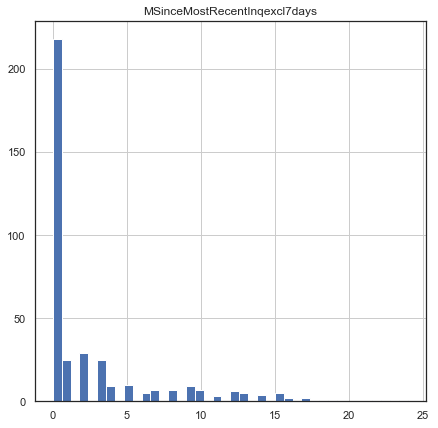

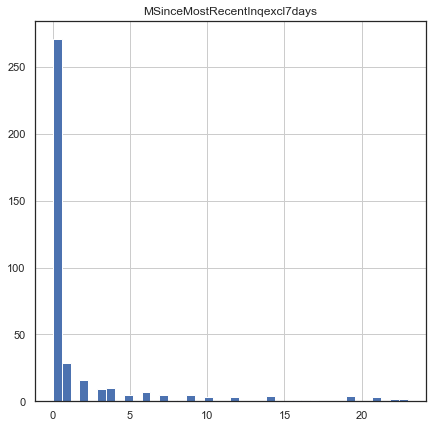

In [55]:
df[df['RiskPerformance'] == 'Good'][['MSinceMostRecentInqexcl7days']].hist(figsize=(7,7), bins=40)
df[df['RiskPerformance'] == 'Bad'][['MSinceMostRecentInqexcl7days']].hist(figsize=(7,7), bins=40)

### - Discuss your findings from the plots above. Do you find any features or feature combinations that are indicative of the target outcome ? Explain in plain words (a short paragraph) the story of your findings so far.

These data are very difficult to understand, because both those with estimate risk and those with low risk have good and bad risk performance. 

Correlations for the numeric features shows that the more of The months since most recent inquiry excluidng 7days, The more of The months since The oldest trade open, Whcih shows that regular clients will still have deals this days. And The more satisfied The transaction, The more total transactions.

Categorical feature plots didn’t show much , but the most obvious is risk performance bad is generally more than good if someone has a delinquent, but for those who current and never delinquent people the number of good is more than bad. This indicates people have more delinquent, the risk performance shows worse.

Among the last four plots, the risk performance is better, the more of the total number of trade which appears the people has better risk performance, they are easier have trade and get more trade. The good risk performance people’s percent of trades that never delinquent is almost double of bad risk performance, which shows the delinquent is an important influence factor of risk performance. The higher of the external risk estimate, the higher of the risk, and the worse of risk performance. The month since most recent inquiries excluding 7 days seems like not have much relationship with the risk performance.

These features are used for credit risk prediction


#  (4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

1. **Due to MaxDelq2PublicRecLast12Mfirst and MaxDelqEver have some repeat parts, so we combine the first part to the second, and count the Max delinquent ever, which multiple the the percentage of trades delinquent, which can get the number of delinquency**

In [56]:
count = 0
for i in df['MaxDelqEver']:
    if i != 8:
        count +=1
count

487

In [57]:
df['delinquency'] =(1- df['PercentTradesNeverDelq']*0.01) *count

2. **We can get the total net fraction burden by add NetFractionRevolvingBurden and NetFractionInstallBurden**

In [62]:
df['TotalNetFraction'] = df['NetFractionRevolvingBurden'] + df['NetFractionInstallBurden']

3. **Number Trades 90+Ever divided Number of Total is the percentage of number trade 90+. Number of Trade open in last 12 months divided number of total is the percentage of number trade last 12 months, the average of them we can get the trade frequency roughly**

In [64]:
df['TradeFrequency'] = df['NumTrades90Ever2DerogPubRec']/df['NumTotalTrades']+df['NumTradesOpeninLast12M']/df['NumTotalTrades']

In [65]:
# Write the dataframe to a csv file
df.to_csv('New_Feature_CreditRisk_3_.csv', index=False)